In [2]:
import json 

In [3]:
path = 'usagov_bitly_data2013-05-17-1368832207'

In [4]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build\\/JZO54K) AppleWebKit\\/534.30 (KHTML, like Gecko) Version\\/4.0 Mobile Safari\\/534.30", "c": "US", "nk": 0, "tz": "America\\/Los_Angeles", "gr": "CA", "g": "15r91", "h": "10OBm3W", "l": "pontifier", "al": "en-US", "hh": "j.mp", "r": "direct", "u": "http:\\/\\/www.nsa.gov\\/", "t": 1368832205, "hc": 1365701422, "cy": "Anaheim", "ll": [ 33.816101, -117.979401 ] }\n'

In [5]:
records = [json.loads(line) for line in open(path)]

In [6]:
records[0]

{u'a': u'Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build/JZO54K) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30',
 u'al': u'en-US',
 u'c': u'US',
 u'cy': u'Anaheim',
 u'g': u'15r91',
 u'gr': u'CA',
 u'h': u'10OBm3W',
 u'hc': 1365701422,
 u'hh': u'j.mp',
 u'l': u'pontifier',
 u'll': [33.816101, -117.979401],
 u'nk': 0,
 u'r': u'direct',
 u't': 1368832205,
 u'tz': u'America/Los_Angeles',
 u'u': u'http://www.nsa.gov/'}

In [7]:
records[0]['tz']

u'America/Los_Angeles'

##Counting Time Zone in Pure Python

In [8]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec ]

In [9]:
time_zones[:10]

[u'America/Los_Angeles',
 u'',
 u'America/Phoenix',
 u'America/Chicago',
 u'',
 u'America/Indianapolis',
 u'America/Chicago',
 u'',
 u'Australia/NSW',
 u'']

In [10]:
def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] +=1
    return counts

In [11]:
from collections import defaultdict

In [12]:
counts = get_counts2(time_zones)

In [13]:
counts['America/New_York']

903

In [14]:
len(time_zones)

3839

In [15]:
def top_count(count_dict, n=10):
    value_key_pairs = [(count, key) for key, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [16]:
top_count(counts)

[(40, u'America/Phoenix'),
 (50, u'America/Indianapolis'),
 (85, u'Europe/London'),
 (89, u'America/Denver'),
 (102, u'Asia/Tokyo'),
 (184, u'America/Puerto_Rico'),
 (421, u'America/Los_Angeles'),
 (636, u''),
 (686, u'America/Chicago'),
 (903, u'America/New_York')]

In [17]:
from collections import Counter

In [18]:
counts = Counter(time_zones)

In [19]:
counts.most_common(10)

[(u'America/New_York', 903),
 (u'America/Chicago', 686),
 (u'', 636),
 (u'America/Los_Angeles', 421),
 (u'America/Puerto_Rico', 184),
 (u'Asia/Tokyo', 102),
 (u'America/Denver', 89),
 (u'Europe/London', 85),
 (u'America/Indianapolis', 50),
 (u'America/Phoenix', 40)]

## Counting Time Zones using Pandas

In [20]:
from pandas import DataFrame, Series

In [21]:
import pandas as pd

In [22]:
frame = DataFrame(records)

In [23]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; H...,en-US,US,Anaheim,15r91,CA,10OBm3W,1365701422,j.mp,NaN,pontifier,"[33.816101, -117.979401]",0,direct,1368832205,America/Los_Angeles,http://www.nsa.gov/
1,NaN,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,en-us,None,NaN,ifIpBW,NaN,ifIpBW,1302189369,1.usa.gov,NaN,bitly,NaN,0,http://www.usa.gov/,1368832207,,http://answers.usa.gov/system/selfservice.cont...
2,NaN,Mozilla/5.0 (Windows NT 6.1; rv:21.0) Gecko/20...,"en-US,en;q=0.5",US,Fort Huachuca,10DaxOu,AZ,10DaxOt,1368814585,1.usa.gov,NaN,jaxstrong,"[31.5273, -110.360703]",1,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1368832209,America/Phoenix,http://www.saj.usace.army.mil/Media/NewsReleas...
3,NaN,Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; S...,en-US,US,Houston,TysVFU,TX,TChsoQ,1354719206,1.usa.gov,NaN,o_5004fs3lvd,"[29.7633, -95.363297]",1,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,1368832209,America/Chicago,https://nationalregistry.fmcsa.dot.gov/
4,NaN,Opera/9.80 (Android; Opera Mini/7.5.33286/29.3...,en,None,NaN,10IGW7m,NaN,10IGW7l,1368738258,1.usa.gov,NaN,peacecorps,NaN,0,http://t.co/CDO9hLTtNT,1368832208,,http://www.peacecorps.gov/learn/howvol/ab530gr...
5,NaN,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,en-US,US,Mishawaka,13GrCeP,IN,13GrCeP,1368130510,1.usa.gov,NaN,bitly,"[41.612301, -86.1381]",0,direct,1368832209,America/Indianapolis,https://petitions.whitehouse.gov/petition/repe...
6,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) G...,"en-US,en;q=0.5",US,Hammond,YmtpnZ,WI,YmtpnZ,1363711958,1.usa.gov,NaN,bitly,"[45.007, -92.459099]",1,http://www.bwsd.k12.wi.us/SitePages/Home.aspx,1368832210,America/Chicago,http://pld.dpi.wi.gov/files/pld/images/LinkWI.png
7,NaN,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_3_5 li...,en-us,None,NaN,13oM0hV,NaN,15PUeH0,1368714329,go.nasa.gov,NaN,nasatwitter,NaN,0,http://t.co/YIsVhFDLj2,1368832211,,http://www.nasa.gov/multimedia/imagegallery/im...
8,NaN,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,en-us,AU,Sydney,15r91,02,10OBm3W,1365701422,j.mp,NaN,pontifier,"[-33.8615, 151.205505]",0,direct,1368832213,Australia/NSW,http://www.nsa.gov/
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",None,NaN,109LtDc,NaN,109LtDb,1368821840,go.nasa.gov,NaN,nasatwitter,NaN,0,http://t.co/yPSKO2t5v1,1368832215,,http://www.nasa.gov/mission_pages/sunearth/new...


In [24]:
frame['tz'][:10]

0     America/Los_Angeles
1                        
2         America/Phoenix
3         America/Chicago
4                        
5    America/Indianapolis
6         America/Chicago
7                        
8           Australia/NSW
9                        
Name: tz, dtype: object

In [25]:
tz_counts = frame['tz'].value_counts()

In [26]:
tz_counts[:10]

America/New_York        903
America/Chicago         686
                        636
America/Los_Angeles     421
America/Puerto_Rico     184
Asia/Tokyo              102
America/Denver           89
Europe/London            85
America/Indianapolis     50
America/Phoenix          40
dtype: int64

Substituting 'Missing' for missing value 

In [27]:
clean_tz = frame['tz'].fillna('Missing')

In [28]:
clean_tz[:10]

0     America/Los_Angeles
1                        
2         America/Phoenix
3         America/Chicago
4                        
5    America/Indianapolis
6         America/Chicago
7                        
8           Australia/NSW
9                        
Name: tz, dtype: object

In [29]:
clean_tz[clean_tz == ''] = 'Unknown'

In [30]:
tz_counts = clean_tz.value_counts()

In [31]:
tz_counts[:10]

America/New_York        903
America/Chicago         686
Unknown                 636
America/Los_Angeles     421
America/Puerto_Rico     184
Missing                 120
Asia/Tokyo              102
America/Denver           89
Europe/London            85
America/Indianapolis     50
dtype: int64

In [35]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

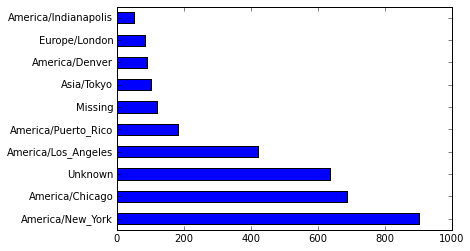

In [38]:
tz_counts[:10].plot(kind='barh', rot=0)

In [42]:
frame['a'][{1, 50, 51}]

1     Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...
50    Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...
51    Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...
Name: a, dtype: object

In [43]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [46]:
results[:10]

0    Mozilla/5.0
1    Mozilla/4.0
2    Mozilla/5.0
3    Mozilla/5.0
4     Opera/9.80
5    Mozilla/5.0
6    Mozilla/5.0
7    Mozilla/5.0
8    Mozilla/5.0
9    Mozilla/5.0
dtype: object

In [48]:
results.value_counts()[:10]

Mozilla/5.0           3251
Mozilla/4.0            322
CakePHP                 38
ShortLinkTranslate      36
TVersity                30
Opera/9.80              28
Dalvik/1.6.0            19
Xenu                    15
GoogleProducer;         13
feedzirra                8
dtype: int64

In [49]:
cframe = frame[frame.a.notnull()]

In [53]:
import numpy as np

In [54]:
operating_system = np.where(cframe.a.str.contains('Windows'), 'Windows', 'Not Windows')

In [57]:
Series(operating_system)[:10]

0    Not Windows
1        Windows
2        Windows
3    Not Windows
4    Not Windows
5        Windows
6        Windows
7    Not Windows
8    Not Windows
9        Windows
dtype: object

In [58]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [64]:
agg_count = by_tz_os.size().unstack().fillna(0)

In [67]:
agg_count[:10]

,Not Windows,Windows
tz,,
,484,152
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,4,2
Africa/Gaborone,0,1
Africa/Johannesburg,2,0
America/Anchorage,5,3
America/Argentina/Buenos_Aires,4,7
America/Argentina/Catamarca,1,0


In [68]:
indexer = agg_count.sum(1).argsort() 

In [69]:
indexer[:10]

tz
                                   55
Africa/Cairo                      101
Africa/Casablanca                 100
Africa/Ceuta                       36
Africa/Gaborone                    97
Africa/Johannesburg                42
America/Anchorage                  43
America/Argentina/Buenos_Aires     44
America/Argentina/Catamarca        47
America/Argentina/Cordoba          50
dtype: int64

In [70]:
count_subset = agg_count.take(indexer)[-10:]

In [71]:
count_subset

,Not Windows,Windows
tz,,
America/Phoenix,22,18
America/Indianapolis,29,21
Europe/London,62,23
America/Denver,41,48
Asia/Tokyo,88,14
America/Puerto_Rico,93,91
America/Los_Angeles,207,214
,484,152
America/Chicago,343,343


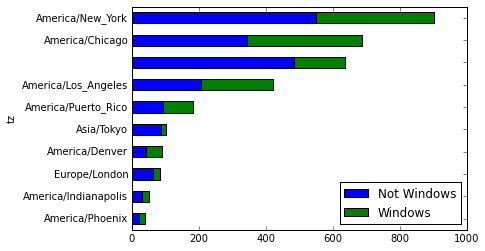

In [72]:
count_subset.plot(kind='barh', stacked=True)